<a href="https://colab.research.google.com/github/stevenwcliu/188-learning/blob/main/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Please submit the different parts of Module 3 in separate notebooks.**

**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 3 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Wencong Liu*:

*wencong.liu@sjsu.edu*

*I plan to take the next available Module 3 Assessment*: Yes

# Module 3, Part 1

Please complete this assignment in a Colab.  

Please submit all parts of the Module 3 assignment as separate notebooks in the Canvas assignment for Module 3 ("Module 3 Assignment").

# Section 0: Initialization 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from google.colab import drive

In [2]:
# mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading data
df = pd.read_csv("/content/drive/MyDrive/188 M3/Sample_Data_m3.csv")
# df.head(3)
df.drop(['Unnamed: 0'], axis = 1,inplace = True) # axis = 1: col ; 0: row

df.head(3)

,a,b,target
0,664159,550946,1
1,665845,557965,1
2,597173,575538,1


# Section 1: Visualization & Pre-Processing

### 1\. Plot scatter plot with data from column 'a' on the x-axis, the data from column 'b' as the y-axis, and the data from the 'target' column as the color parameter (parameter 'c')

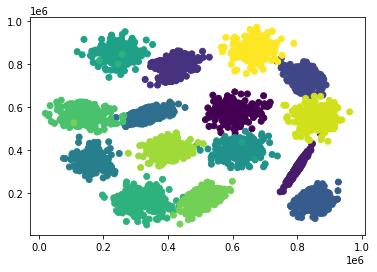

In [4]:
# import matplotlib.pyplot as plot
# list(df.columns.values) # ['Unnamed: 0', 'a', 'b', 'target']
# list(df.a.values)
# df['a']

# df1 = pd.DataFrame([list(df.a.values), list(df.b.values), list(df.target.values)])
# ax1 = df1.plot.scatter(x= 'a',
#                        y= 'b',
#                        c= 'target')

# 
# plot.scatter(df['a'], df['b'], c = df['target'])

# plot.show(block=True);

x = df['a']
y = df['b']
color = df['target']
plt.scatter(x,y, c = color)

### 2\. Split dataset into training and test set & reset the indices of each output dataframe

Notes:
* Reset the index columns for each of the four dataframes output by the train_test_split below (x_train, x_test, y_train, y_test) so that it contains consecutive numbers starting at 0.

* Use a small test set while you are still experimenting since the classification step is time consuming.  You can use a larger one, e.g., 25% once you are ready to plot the confusion matrix at the end of the assignment.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[["a","b"]], df["target"], test_size = 0.25 , random_state = 100)
x_train.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)
x_test.reset_index(inplace = True,drop=True)
y_test.reset_index(inplace = True, drop=True)
# print("y_test after: ")
# print( y_test.head(5))

### 3\.  Add a "target" column to x_train and store the y_train values there

In [6]:
# type(x_train)
# y_train
# pd.concat([x_train, y_train], columns=['a', 'b', 'target'], ignore_index=True)

# series vs dataframe
x_train.insert(2,"target", y_train)
# x_train


# Section 3: KNN Algorithm Implementation

### 1\. Implement a function euclidean_dist(p1,p2) that returns the euclidean distance between two numpy arrays, p1 and p2. 

In [7]:
# ref: https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

import math
def euclidean_dist(p1, p2):
  # calculating Euclidean distance
  # using linalg.norm()
  # return np.linalg.norm(p1 - p2)
  return math.sqrt((p1[0]-p2[0])**2 +(p1[1]-p2[1])**2)
  # print(dist)

# type(p1)
# euclidean_dist(p1,p2)

# p1 = np.array((1, 2, 3))
# p2 = np.array((1, 1, 1))
# euclidean_dist(p1,p2)



### 2\. Implement a function get_closest_neighbors(training_data, test_object, k) which returns the k nearest neighbors to the test object (nearest neighbors from  the training data 

* The function accepts as arguments a numpy matrix (training_data), a test object (a numpy array), and the parameter k.

* The function returns k vectors (the k nearest neighbor to the test object)

* The distance computation is performed using the euclidean_dist() function you wrote in the exercise above.

* The distance computation needs to use the "a" and "b" column values for both a training object and the test object when computing the distance between them (print out the contents of the different variables to make sure you are using the right data) 


In [8]:
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
def get_closest_neighbors(training_data, test_object, k):
  distances = []
  k_closest_neighbors = []
  for train_row in training_data:
	  dist = euclidean_dist(test_object, train_row)
	  distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  
  for i in range(k):
	  k_closest_neighbors.append(distances[i][0])
  return k_closest_neighbors

### 3\. Implement a classification function

Given a set of neighbors, compute what class do the majority of them belong to, using a voting strategy (e.g., each neighbor votes for the class that it belongs to)

Notes:

* You may find the following functions helpful: np.bincount, np.argmax


In [9]:
def knn_classify(neighbors):
  output_values = [row[-1] for row in neighbors]
  majority_vote = max(set(output_values), key=output_values.count)
  return majority_vote
# knn_classify(5)

# alternative sol:
# def knn_classify(neighbors):
#   classes = []
#   rows, columns = np.shape(neighbors)
#   for row in range(0, rows):
#     classes.append(neighbors[row][columns-1])
#   classes = np.array(classes)
#   majority_vote = np.bincount(classes).argmax()
#   return majority_vote

**Use your KNN classifer to classify the test samples in your dataset**
(you do not need to add code here)

In [10]:
# x_train, x_test, y_train, y_test = train_test_split(df[["a","b"]], df["target"], test_size = 0.25 , random_state = 100)
# x_train.reset_index(inplace = True, drop=True)
# y_train.reset_index(inplace = True, drop=True)
# x_test.reset_index(inplace = True,drop=True)
# y_test.reset_index(inplace = True, drop=True)

y_test_pred = []
k = 10

# print("length of x_train", len(x_train))
# print("length of x_test", len(x_test))
for i in tqdm(range(len(x_test))):
# for i in tqdm(range(5)):
  # find k closest neighbors
  # k_neighbors = get_closest_neighbors(x_train.to_numpy(), x_test.iloc[i,:2], k)
  k_neighbors = get_closest_neighbors(x_train.to_numpy(), x_test.iloc[i,:2], k)
  # compute the class for the test object
  test_object_class = knn_classify(k_neighbors)
  # add the prediction to the list of predictions y_test_pred 
  y_test_pred.append(test_object_class)

100%|██████████| 1250/1250 [00:33<00:00, 37.73it/s]


### 4\. Compute the confusion matrix for the above predictions

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# print(y_test_pred[:5])
# print(y_test[:5])
# confusion_matrix(y_true, y_pred)
cm = (confusion_matrix(y_test, y_test_pred))
'''
# The confusion matrix takes two inputs 
# 1) the ground truth class for each of the test data points and 
# 2) the predicted class for each of the test data points.

Each of these is an array of numbers and the length of both is the number of samples you have in your test set.  
For example, if you have 15 samples/objects/rows in your test set, then you will have an array with the 15 class labels that correspond to each of the samples (this is your ground truth that is already in the dataset), and then you will have an array with 15 predicted class labels, each of which is the predicted class (by your model) corresponding to a test sample in your test set.
'''
  



'\n# The confusion matrix takes two inputs \n# 1) the ground truth class for each of the test data points and \n# 2) the predicted class for each of the test data points.\n\nEach of these is an array of numbers and the length of both is the number of samples you have in your test set.  \nFor example, if you have 15 samples/objects/rows in your test set, then you will have an array with the 15 class labels that correspond to each of the samples (this is your ground truth that is already in the dataset), and then you will have an array with 15 predicted class labels, each of which is the predicted class (by your model) corresponding to a test sample in your test set.\n'

### 5\. Use the ConfusionMatrixDisplay.from_predictions function to plot a confusion matrix heatmap

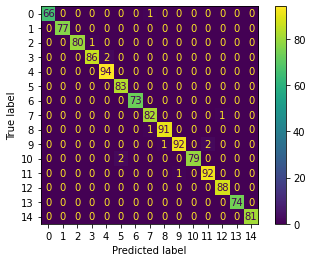

In [12]:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# numbers on the diagonal line: number of predicted label that matches with the true lable in each specific class